In [1]:
import pandas as pd
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [2]:
data_frame = pd.read_csv("E:/environment/git/AI/ML/Data/Loan Data of Dreaming Housing Finance/train.csv")

In [3]:
data_frame.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
data_frame.describe() #get summeries of variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data_frame.apply(lambda x: sum(x.isnull()),axis=0)  #check missing value

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data manipulation

In [6]:
#check some columns that have null values:
#data_frame['Gender'].value_counts() #-> 489 Male vs 112 Female
#data_frame['Married'].value_counts() #-> 398 Yes vs 213 No
#data_frame['Self_Employed'].value_counts() #-> 500 No, 82 Yes => could replace null by No
#data_frame['Credit_History'].value_counts() #-> 475 1.0 vs 89 0.0 => couldd replace null by 1.0
#data_frame['Property_Area'].value_counts()

In [7]:
#replace null values

#replace null values of Self_employed to No 
data_frame['Self_Employed'].fillna('No',inplace = True)
#replace null values of Credit_History to 1.0
data_frame['Credit_History'].fillna(1.0,inplace = True)
#replace null values of Credit_History to 1.0
data_frame['Gender'].fillna('Male',inplace = True)
#replace null values of Credit_History to 1.0
data_frame['Married'].fillna('Yes',inplace = True)
#replace null values of LoanAmount to mean value of its
data_frame['LoanAmount'].fillna(data_frame['LoanAmount'].mean(), inplace=True)

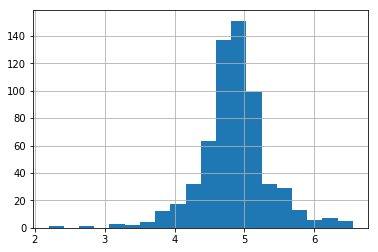

In [8]:
#rescale some vairables
data_frame['LoanAmount_log'] = np.log(data_frame['LoanAmount'])
data_frame['TotalIncome'] = data_frame['ApplicantIncome'] + data_frame['CoapplicantIncome']
data_frame['TotalIncome_log'] = np.log(data_frame['TotalIncome'])
data_frame['LoanAmount_log'].hist(bins=20) 

In [9]:
#convert all our categorical variables into numeric by encoding the categories
from sklearn.preprocessing import LabelEncoder
var_mod = ['Education','Self_Employed','Property_Area','Gender','Married','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    data_frame[i] = le.fit_transform(data_frame[i])
data_frame.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

# Model's creation and training

In [10]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

C:\Users\DatGatto\Anaconda2\envs\fastai\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
outcome_var = 'Loan_Status'

In [22]:
model = GaussianNB()
predictor_var = ['Credit_History','LoanAmount_log']
classification_model(model, data_frame ,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%
